<a href="https://colab.research.google.com/github/mvgarc/Metodos_Postgrado/blob/main/TAREA_AMAZON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df_amazon = pd.read_csv('Amazon_stock_data.csv')

print(df_amazon.dtypes)
df_amazon.head()

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


,Date,Close,High,Low,Open,Volume
0,1997-05-15,0.097917,0.125000,0.096354,0.121875,1443120000
1,1997-05-16,0.086458,0.098958,0.085417,0.098438,294000000
2,1997-05-19,0.085417,0.088542,0.081250,0.088021,122136000
3,1997-05-20,0.081771,0.087500,0.081771,0.086458,109344000
4,1997-05-21,0.071354,0.082292,0.068750,0.081771,377064000


In [21]:
# Filtrar columnas numéricas
df_numeric = df_amazon.select_dtypes(include=['float64', 'int64'])

# Verificar
df_numeric.head()

,Close,High,Low,Open,Volume
0,0.097917,0.125000,0.096354,0.121875,1443120000
1,0.086458,0.098958,0.085417,0.098438,294000000
2,0.085417,0.088542,0.081250,0.088021,122136000
3,0.081771,0.087500,0.081771,0.086458,109344000
4,0.071354,0.082292,0.068750,0.081771,377064000


In [23]:
# Asignar X y y
X = df_numeric.drop(columns=['Close'])
y = df_numeric['Close']

X_const = sm.add_constant(X)

# 2. Regresión lineal
modelo = sm.OLS(y, X_const).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.471e+07
Date:                Tue, 24 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:06:56   Log-Likelihood:                -5245.9
No. Observations:                7067   AIC:                         1.050e+04
Df Residuals:                    7062   BIC:                         1.054e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0033      0.011      0.311      0.7

In [24]:
selector = SequentialFeatureSelector(LinearRegression(), direction='forward')
selector.fit(X, y)

# Mostrar variables seleccionadas
selected_features = X.columns[selector.get_support()]
print("Variables seleccionadas:", list(selected_features))

Variables seleccionadas: ['High', 'Low']


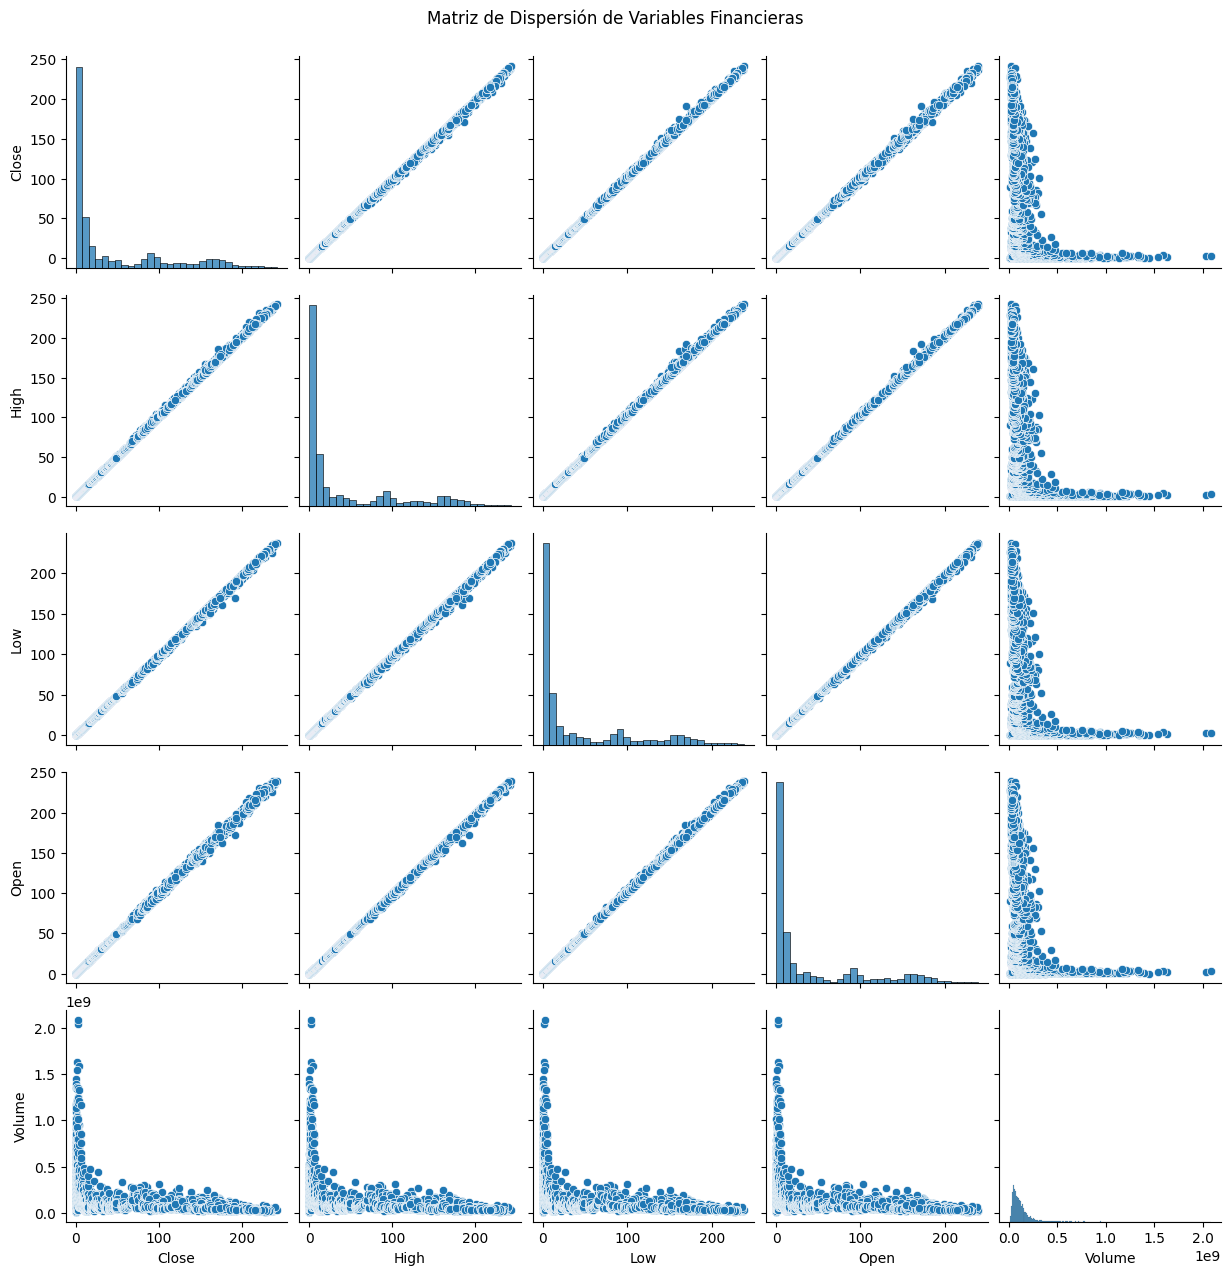

In [25]:
df_plot = df_numeric.copy()
sns.pairplot(df_plot)
plt.suptitle("Matriz de Dispersión de Variables Financieras", y=1.02)
plt.show()

**Análisis de Regresión Lineal Múltiple sobre Datos de Amazon**

Se aplicó un modelo de regresión lineal múltiple con el objetivo de predecir el precio de cierre (Close) de la acción de Amazon utilizando como variables independientes: Open, High, Low y Volume.

Los resultados del modelo muestran un coeficiente de determinación **R² = 1.000**, lo cual indica que el modelo explica prácticamente toda la variabilidad del precio de cierre. Si bien este valor es óptimo, también es una señal de posible multicolinealidad, ya que algunas de las variables (por ejemplo High, Low y Open) están altamente correlacionadas entre sí.

Entre las variables evaluadas, las que mostraron mayor impacto y significancia estadística (p < 0.05) fueron:

- High con coeficiente positivo (+0.8166)

- Low con coeficiente positivo (+0.7989)

- Open, aunque significativa, mostró un coeficiente negativo (–0.6151), posiblemente por redundancia con High y Low

- Volume no resultó significativa para el modelo, con un coeficiente cercano a cero y un p-valor alto (0.946)

Mediante el método de selección Stepwise (forward) se concluyó que las variables High y Low son suficientes para construir un modelo altamente explicativo. Esto simplifica el modelo sin perder poder predictivo.

El modelo predice de forma precisa el precio de cierre con solo dos variables (High y Low). Sin embargo, se recomienda hacer un análisis más profundo para controlar posibles efectos de multicolinealidad.